<a href="https://colab.research.google.com/github/darren96483/Math-Modeling-2025/blob/main/Multivariate_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

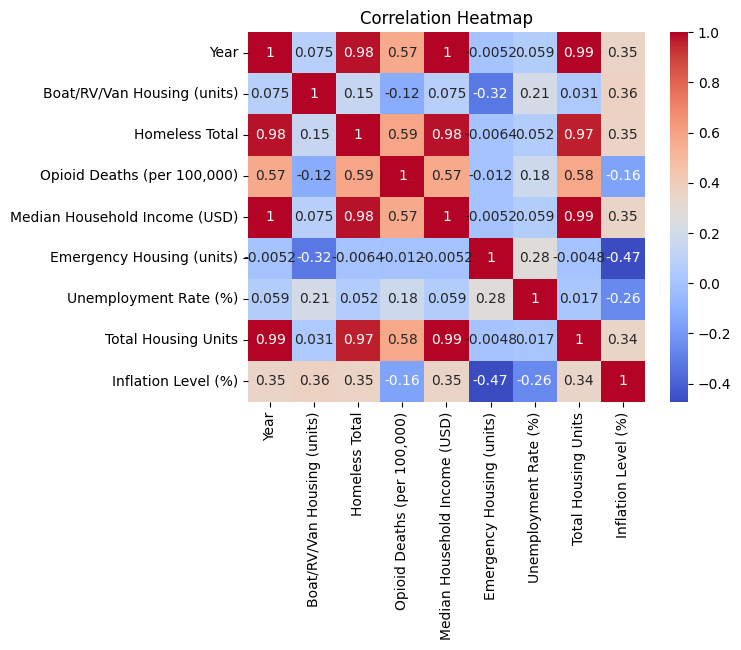

[233608.79120879 277498.9010989  409169.23076923]


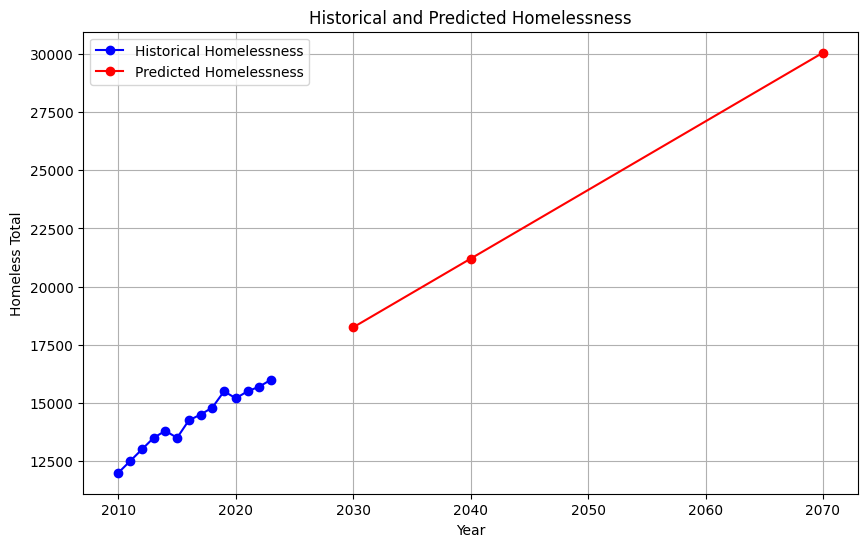

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load and preprocess data
data = pd.read_csv("Multivariate Regressionx.csv")
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Define features and target
feature_columns = [
    "Year",
    "Total Housing Units",
    "Median Household Income (USD)",
]
X = data[feature_columns]
y = data["Homeless Total"]

# Handle missing data by filling with mean (if needed)
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Train the homeless total model
model = LinearRegression()
model.fit(X, y)
data['Predicted Homeless Total'] = model.predict(X)

# Predict Total Housing Units for future years
X_housing = data[['Year']].values  # Year as the independent variable
y_housing = data['Total Housing Units'].values

Housing_model = LinearRegression()
Housing_model.fit(X_housing, y_housing)
future_years = np.array([[2030], [2040], [2070]])  # Future years as a 2D array
future_predictions = Housing_model.predict(future_years)
print(future_predictions)

X_Income = data[['Year']].values  # Year as the independent variable
y_Income = data['Median Household Income (USD)'].values
Income_model = LinearRegression()
Income_model.fit(X_Income, y_Income)
future_years = np.array([[2030], [2040], [2070]])  # Future years as a 2D array

Income_model = LinearRegression()
Income_model.fit(X_Income, y_Income)
# Future years and predictions
future_years = pd.DataFrame({
    "Year": [2030, 2040, 2070],
    "Total Housing Units": Housing_model.predict(np.array([[2030], [2040], [2070]])),
    "Median Household Income (USD)": Income_model.predict(np.array([[2030], [2040], [2070]])),  # Example projections
})

# Predict homelessness for future years
future_predictions = model.predict(future_years)
future_years['Predicted Homeless Total'] = future_predictions

# Combine historical and predicted data
historical_data = data[["Year", "Homeless Total"]]
combined_data = pd.concat(
    [historical_data, future_years[["Year", "Predicted Homeless Total"]].rename(columns={"Predicted Homeless Total": "Homeless Total"})],
    ignore_index=True,
)

# Plot historical and predicted homelessness
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Homeless Total'], marker='o', color='blue', label='Historical Homelessness')
plt.plot(future_years['Year'], future_years['Predicted Homeless Total'], marker='o', color='red', label='Predicted Homelessness')
plt.xlabel('Year')
plt.ylabel('Homeless Total')
plt.title('Historical and Predicted Homelessness')
plt.legend()
plt.grid(True)
plt.show()

# Display predictions